In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#holt winters method
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [3]:
data = pd.read_csv('Retail_sales_of_electricity_United_States_monthly.csv', index_col='Month', parse_dates=True)
data.head()

C:\Users\omord\AppData\Local\Temp\ipykernel_17548\355906189.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('Retail_sales_of_electricity_United_States_monthly.csv', index_col='Month', parse_dates=True)


,all sectors million kilowatthours,residential million kilowatthours,commercial million kilowatthours,industrial million kilowatthours
Month,,,,
2023-12-01,341010.38748,142838.92146,114842.52383,82723.41953
2023-12-01,NaN,NaN,NaN,NaN
2023-12-01,NaN,NaN,NaN,NaN
2023-11-01,310959.15193,119052.47929,108918.04378,82426.92228
2023-10-01,293487.06424,102427.52221,107050.72376,83460.29819


In [4]:
data.dropna(inplace=True)

<Axes: xlabel='Month'>

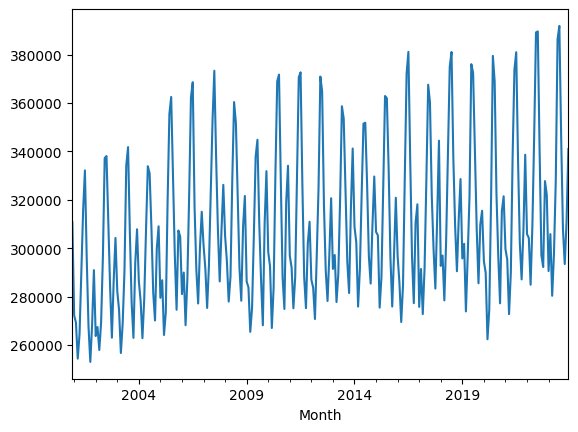

In [5]:
data.sort_index(inplace=True)
data.head() #sort rising date
data['all sectors million kilowatthours'].plot()

In [6]:
data.index.freq='MS'   

In [7]:
train_data=data.iloc[:-12]
test_data=data.iloc[-12:]

In [8]:
fitHoltWinter=ExponentialSmoothing(train_data['all sectors million kilowatthours'], trend='add',seasonal='add',seasonal_periods=12).fit()   #another problem

C:\Users\omord\PycharmProjects\NTlabs7\venv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [9]:
fcastHoltWinter=fitHoltWinter.forecast(len(test_data)).rename('HW Forecast')
fcastHoltWinter

2023-01-01    302719.208599
2023-02-01    302893.915128
2023-03-01    281985.513050
2023-04-01    301804.178871
2023-05-01    339839.331700
2023-06-01    380773.519884
2023-07-01    378159.610831
2023-08-01    335169.547848
2023-09-01    303288.775702
2023-10-01    290114.760515
2023-11-01    319672.417474
2023-12-01    337748.645182
Freq: MS, Name: HW Forecast, dtype: float64

<Axes: xlabel='Month'>

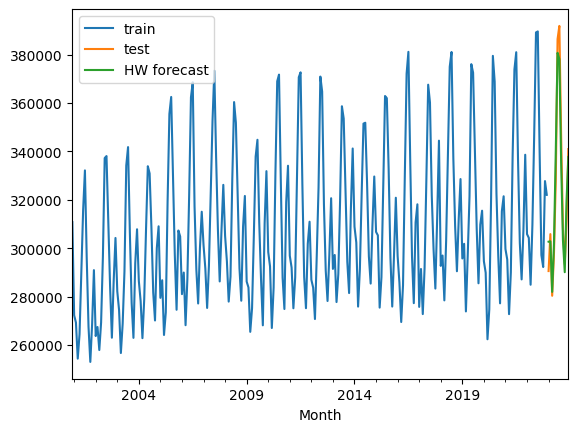

In [10]:
train_data['all sectors million kilowatthours'].plot(legend=True,label='train')
test_data['all sectors million kilowatthours'].plot(legend=True,label='test')
fcastHoltWinter.plot(legend=True,label='HW forecast')